In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 범죄 데이터 준비
df_crime = pd.read_excel("data-files/crime-in-seoul.xlsx", header=3)
df_crime2 = df_crime.iloc[:, -10:].copy()
df_crime2["자치구"] = df_crime.iloc[:, 1]

# 1. 컬럼명 변경 : 살인발생, 살인검거, 강도발생, 강도검거, 강간발생, 강간검거, 절도발생, 절도검거, 폭력발생, 폭력검거
new_columns = ["살인발생", "살인검거", "강도발생", '강도검거', "강간발생", "강간검거", "절도발생", "절도검거", "폭력발생", "폭력검거", "자치구"]
df_crime2.columns = new_columns

# 2. 자치구 컬럼을 index로 변경
df_crime2.set_index("자치구", inplace=True)

# 소계 행 제거
df_crime2.drop("소계", axis=0, inplace=True)

# 서대문구, 강도발생 데이터 '-' --> 0, 자료형은  int로 변경
df_crime2.loc['서대문구', '강도발생'] = '0'
df_crime2['강도발생'] = df_crime2['강도발생'].astype(int) # astype : 자료형 변경

# 3. 각 범죄에 대한 검거율 계산하고 컬럼으로 저장 : 검거/발생
for n in range(0, 10, 2):
    cname = df_crime2.columns[n].replace('발생', "검거율")
    df_crime2[cname] = df_crime2.iloc[:,n+1] / df_crime2.iloc[:,n]
df_crime2

# 4. 처리되 데이터프레임을 파일로 저장 (data-files/crime-in-seoul-2.csv)
df_crime2.to_csv('data-files/crime-in-seoul-2.csv')

In [33]:
# 5. population-in-seoul-2.csv 파일의 데이터 읽기
df_population = pd.read_csv('data-files/population-in-seoul-2.csv')
df_population
# 6. 5의 데이터를 4의 데이터프레임에 병합
df_crime2
df_pop_crime = pd.merge(left=df_population, right=df_crime2,
                        left_on="자치구", right_index=True, 
                        how='inner')
# 7. cctv-in-seoul-2.csv 파일의 데이터 읽기
df_cctv = pd.read_csv('data-files/cctv-in-seoul-2.csv')
df_cctv
# 8. 7의 데이터를 6의 데이터에 병합
df_pop_crime_cctv = pd.merge(left=df_pop_crime, right=df_cctv,
                             on="자치구", how='inner')

# 9. 각 범죄에 대한 인구 대비 발생율 계산하고 범죄발생율 컬럼으로 저장
df_pop_crime_cctv.columns
cols = ['살인발생', '강도발생', '강간발생', '절도발생', '폭력발생']
for col in cols:
    cname = f"인구대비{col}율"
    df_pop_crime_cctv[cname] = df_pop_crime_cctv[col] / df_pop_crime_cctv['2024-인구수']
df_pop_crime_cctv.head(2)

# 10. 범죄발생율, 검거율, CCTV 상관관계 비교
df_pop_crime_cctv.columns
cols2 = ['살인검거율', '강도검거율','강간검거율', '절도검거율', '폭력검거율',
         '인구대비살인발생율', '인구대비강도발생율', '인구대비강간발생율', '인구대비절도발생율', '인구대비폭력발생율',
         '최근증가율']
df_pop_crime_cctv[cols2]
corr = df_pop_crime_cctv[cols2].corr()
corr

,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구대비살인발생율,인구대비강도발생율,인구대비강간발생율,인구대비절도발생율,인구대비폭력발생율,최근증가율
살인검거율,1.000000,-0.269076,0.159837,0.371821,0.277120,-0.043049,0.050810,-0.004228,0.117351,0.163590,-0.021950
강도검거율,-0.269076,1.000000,0.402941,0.070433,0.044125,0.243922,0.063734,0.231652,0.202725,0.314466,0.374463
강간검거율,0.159837,0.402941,1.000000,0.525994,0.085951,0.408312,0.465342,0.589452,0.813017,0.723089,0.630165
절도검거율,0.371821,0.070433,0.525994,1.000000,0.533649,0.221446,0.058121,0.166877,0.248099,0.363316,0.214118
폭력검거율,0.277120,0.044125,0.085951,0.533649,1.000000,-0.059087,-0.024157,-0.148828,-0.157568,-0.071301,0.236348
인구대비살인발생율,-0.043049,0.243922,0.408312,0.221446,-0.059087,1.000000,0.604525,0.362876,0.558882,0.511366,0.296006
인구대비강도발생율,0.050810,0.063734,0.465342,0.058121,-0.024157,0.604525,1.000000,0.718753,0.752524,0.686745,0.278235
인구대비강간발생율,-0.004228,0.231652,0.589452,0.166877,-0.148828,0.362876,0.718753,1.000000,0.814294,0.884975,0.262281
인구대비절도발생율,0.117351,0.202725,0.813017,0.248099,-0.157568,0.558882,0.752524,0.814294,1.000000,0.873034,0.433911
인구대비폭력발생율,0.163590,0.314466,0.723089,0.363316,-0.071301,0.511366,0.686745,0.884975,0.873034,1.000000,0.320073


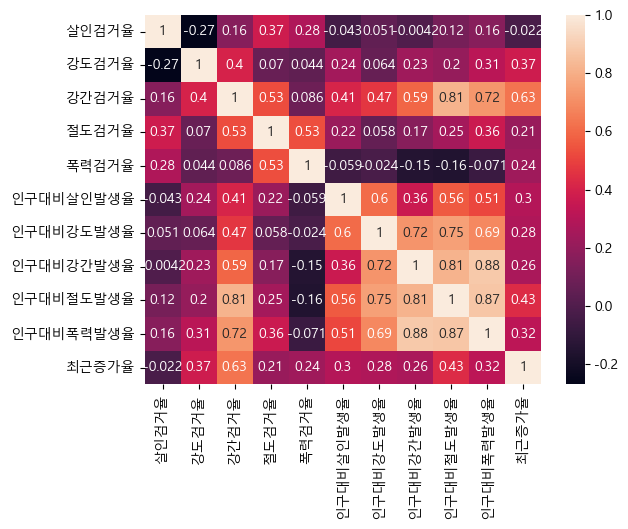

In [35]:
import matplotlib.font_manager as fm

# font file 경로를 사용해서 matplotlib이 관리하는 폰트 이름 가져오기
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams['font.family'] = font_name # matplotlib가 사용할 폰트 지정
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
sns